# Healthcare Data Analyst Project — EDA
Synthetic dataset for KPIs, readmissions, LOS, and quality proxies.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
patients = pd.read_csv('patients.csv')
encounters = pd.read_csv('encounters.csv', parse_dates=['admit_datetime','discharge_datetime'])
diagnoses = pd.read_csv('diagnoses.csv')
labs = pd.read_csv('labs.csv', parse_dates=['collected_datetime'])
meds = pd.read_csv('medications.csv')
patients.head(), encounters.head()


(   patient_id first_name  last_name sex      race         dob  zip_code
 0           1      Riley     Garcia   M     White  1992-05-13     44471
 1           2     Taylor        Kim   M  Hispanic  1944-12-27     32475
 2           3      Casey  Rodriguez   F  Hispanic  1937-03-30     46913
 3           4      Chris      Brown   M     White  2001-07-12     73678
 4           5      Riley      Brown   F     Other  1959-09-04     50821,
    encounter_id  patient_id encounter_type admit_datetime  discharge_datetime  \
 0             1        2423      Inpatient     2023-12-24 2023-12-27 06:00:00   
 1             2         856      Inpatient     2022-06-14 2022-06-16 21:00:00   
 2             3        3698     Outpatient     2024-10-18 2024-10-18 13:00:00   
 3             4        3447     Outpatient     2024-05-26 2024-05-26 10:00:00   
 4             5         479     Outpatient     2023-12-07 2023-12-07 05:00:00   
 
    length_of_stay_days discharge_disposition  total_charges  \
 0 

In [9]:
# KPIs
readmission_rate = encounters['readmitted_within_30d'].mean()*100
avg_los = encounters.loc[encounters['encounter_type']=='Inpatient','length_of_stay_days'].mean()
print(f'Readmission Rate: {readmission_rate:.2f}%')
print(f'Average LOS (days): {avg_los:.2f}')


Readmission Rate: 6.40%
Average LOS (days): 2.47


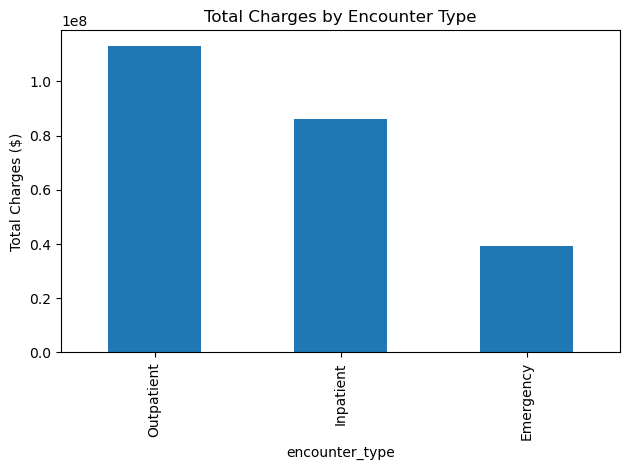

In [10]:
# Charges by encounter type
charges_by_type = encounters.groupby('encounter_type')['total_charges'].sum().sort_values(ascending=False)
charges_by_type.plot(kind='bar', title='Total Charges by Encounter Type')
plt.ylabel('Total Charges ($)'); plt.tight_layout(); plt.show()


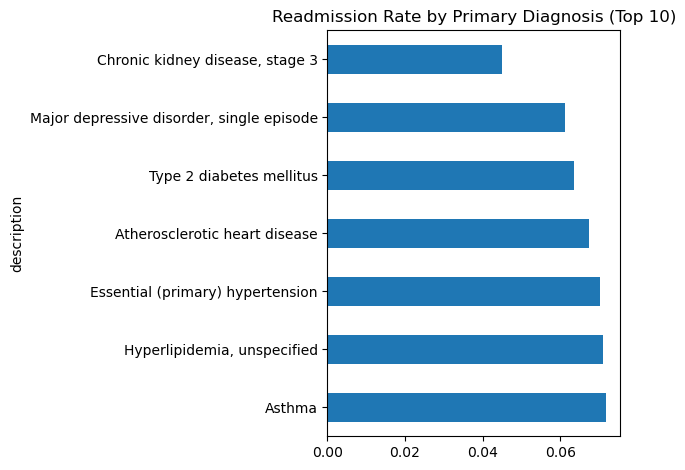

In [11]:
# Readmission rate by primary diagnosis (top 10)
pri = diagnoses[diagnoses['priority']=='P'].copy()
merged = pri.merge(encounters[['encounter_id','readmitted_within_30d']], on='encounter_id', how='left')
readmit_by_dx = merged.groupby('description')['readmitted_within_30d'].mean().sort_values(ascending=False).head(10)
readmit_by_dx.plot(kind='barh', title='Readmission Rate by Primary Diagnosis (Top 10)'); plt.tight_layout(); plt.show()
